  Code              Node
0   CN         Champlain
1   AY            Albany
2   NG           Newburg
3   NK           NewYork
4   HS  Highgate Springs
   Code     Node
15   WN   Weston
16   CT   Canton
17   HN  Houlton
18   BR   Bangor
19   BN   Boston
Code         NK
Node    NewYork
Name: 3, dtype: object
0     CN
1     AY
2     NG
3     NK
4     HS
5     DL
6     SJ
7     WR
8     SD
9     HD
10    NH
11    CD
12    SE
13    PE
14    RG
15    WN
16    CT
17    HN
18    BR
19    BN
Name: Code, dtype: object
                  Node
Code                  
CN           Champlain
AY              Albany
NG             Newburg
NK             NewYork
HS    Highgate Springs
Node    Derby Line
Name: DL, dtype: object
   E1  E2   Km  Costo
0  CN  AY  178     90
1  AY  SD   87     67
2  AY  NG   90    100
3  NG  HD   97     50
4  NG  NK   69     58
5  NK  NH   81     90
6  HS  WR  130    120
               Km       Costo
count   27.000000   27.000000
mean    72.518519   62.074074
std     51.628384

/tmp/ipykernel_360/3593826610.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(arcos.corr())


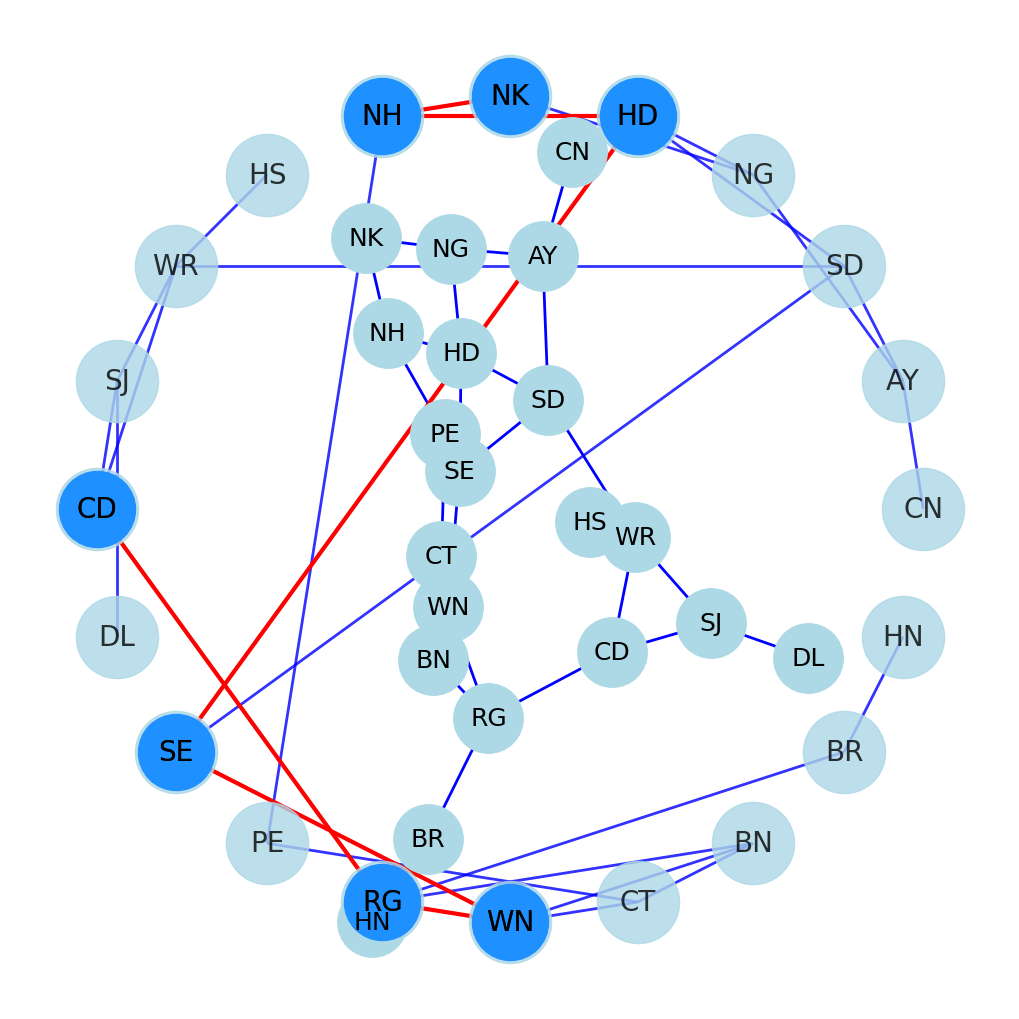

In [2]:
import networkx as nx  # Networkx para grafos
import pandas as pd  # Pandas para importar datos
import matplotlib.pyplot as plt  # Mathplotlib para graficar



nodos = pd.read_csv('Estados.csv', sep=';')
print(nodos.head())
print(nodos.tail())
print(nodos.loc[3])
print(nodos['Code'])
nodos.set_index(["Code"], inplace=True)
print(nodos.head())
print(nodos.loc['DL'])
# %% Arcos - arista
arcos = pd.read_csv('Conexiones.csv', sep=';')
print(arcos.head(7))
print(arcos.describe())
print(arcos.corr())

# %% Creando el grafo
G = nx.from_pandas_edgelist(arcos, "E1", "E2", ["Km", "Costo"])
print(G.nodes())  # muestra la lista de nodos
print(G.order())  # retornar el orden
print(G.edges())  # muestra la lista de aristas
print(G.size())  # Tamaño del grafo
print(G.has_node('AY'))
print(G.has_node('AX'))

# %%Graficando
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.figure()
nx.draw_spring(G,
                node_color="lightblue",
                edge_color="blue",
                font_size=18,
                width=2, with_labels=True, node_size=2500)

# %%Obteniendo camino más corto _ Rutas
# General
camino = list(nx.all_shortest_paths(G, source='NK', target='CD'))
print('Caminos más cortos: \n', camino)
# Dijkstra
cdk1 = list(nx.dijkstra_path(G, source='NK', target="CD", weight='Km'))
print('Camino por algoritmo dijkstra KM: \n', cdk1)
cdk2 = list(nx.dijkstra_path(G, source='NK', target="CD", weight='Costo'))
print('Camino por algoritmo dijkstra $: \n', cdk2)
# A*
as1 = list(nx.astar_path(G, ('NK'), ('CD'), weight="Km"))
print('Camino por algoritmo A* KM: \n', as1)
as2 = list(nx.astar_path(G, ('NK'), ('CD'), weight="Costo"))
print('Camino por algoritmo A* $: \n', as2)

# %% Mostrando la ruta e información de interés
def ver_ruta(ruta):  # método
  total_km = 0
  total_costo = 0
  print('Descripción de la ruta: ')
  for i in range(len(ruta)-1):
    origen = ruta[i]
    destino = ruta[i+1]
    Km = G[origen][destino]['Km']
    costo = G[origen][destino]['Costo']
    total_km += Km
    total_costo += costo
    print(nodos.loc[origen]['Node'], '->', nodos.loc[destino]['Node'],
    ': distancia en Km: ', Km,
    ', costo del trayecto $: ', costo)
  print('Duración total: ', total_km, ' Km',
  ', Costo total:', total_costo, '$')
  print('..........................................')
ver_ruta(as1)  # Selección por Km
ver_ruta(as2)  # Selección por Costo

# %% Graficando la ruta
def plot_ruta(ruta): #Método de graficación
  posi = nx.circular_layout(G) #posición para graficación
  nx.draw(G, pos=posi, #grafo principal
  node_color='lightblue',
  edge_color='blue',
  font_size=20,
  width=2, with_labels=True, node_size=3500, alpha=0.8)
  subG=nx.Graph() #Grafo auxiliar con la ruta escogida
  for i in range(len(ruta)-1):
    subG.add_edge(ruta[i], ruta[i+1])

  nx.draw(subG, pos=posi, #ruta
      node_color='dodgerblue',
      edge_color='red',
      font_size=20,
      width=3, with_labels=True, node_size=3000
    )
  plt.show()
  
plot_ruta(as1) #graficando ruta


